In [1]:
import os
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
!pip install skimpy
from termcolor import colored
from skimpy import skim

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import shapiro, kruskal, chi2_contingency


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import pickle 
import warnings
warnings.filterwarnings('ignore')

ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\MohR9\\Anaconda3\\Lib\\site-packages\\~yarrow\\arrow.dll'
Consider using the `--user` option or check the permissions.



  Obtaining dependency information for skimpy from https://files.pythonhosted.org/packages/35/aa/54c92f6b62eeda185aaaa5259b7df0b15a690f300c609a541561ffa86486/skimpy-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for click<9.0.0,>=8.1.6 from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
  Obtaining dependency information for polars<0.20.0,>=0.19.0 from https://files.pythonhosted.org/packages/df/5e/8c5280f6b709fc0749f7eaf586933cd6f089bfb724f8751a81df2fc82e0e/polars-0.19.19-cp38-abi3-win_amd64.whl.metadata
  Obtaining dependency information for pyarrow<14.0.0,>=13.0.0 from https://files.pythonhosted.org/packages/17/65/47c519fd198713631ca004e38ae48e244a4f4708ba32691caa54b36508a4/pyarrow-13.0.0-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for typeguard==4.1.4 from https://files.pythonhosted.org/packages/7a/11/8eb20601628d36a0e86f35e4db622357d5672b9d3

ModuleNotFoundError: No module named 'skimpy'

In [2]:
path1 = 'D:\\etude_data_science\\kaggle_competition\\07_academic_success\\dataset\\'
os.listdir(path1)

<IPython.core.display.Javascript object>

In [9]:
df_path = os.path.join(path1,"train.csv")

<IPython.core.display.Javascript object>

In [8]:
data = pd.read_csv(df_path)
df  = data.copy()

<IPython.core.display.Javascript object>

# Classification with an Academic Success Dataset
- Compétition disponible sur https://www.kaggle.com/competitions/playground-series-s4e6

# Plan : 
### 1. Connaissance des données
- Description des données ; quelles informations a-t-on sur la Target ? Les Features ?
- dimensions du dataframe
- type de données
- présence de NaN ?

### 2. Datavizualisation & test statistiques : 
- Séparation des variables en fonction de leur type et réattribution des dtypes
    - variables quantiative continues = float  (contiendra aussi les variables discrètes avec + de 10 modalités)
    - variables quantitative discrète = int
    - variables qualitatives = object
- Visualisation des données
    - Analyse univariée
        - Visualisation des variables continues & test de shapiro (normalité)
        - Réduction de modalité pour certaines variables continues et conversion en variable discrète
        - Visualisation des variables discrètes    
        - Visualisation de la variable qualitative (target)
    - Test statistique :
        - Target Vs variables continues : Test Kruskal-Wallis
        - Target vs variables discrètes : test Khi2
    - Analyse bivariée :
        - Target Vs variables discrètes : barplot empilé, ...
        - Target Vs variables continues : boxplot
    - Multivariée
        - Target Vs plusieurs variables discrètes et/ou continues

### 3. Preprocessing
- Standardisation des variables continues
- Enregistrement du dataframe pour la modélisation


**Description du jeu de données**

- Pour cela, rendez-vous sur la partie data, sur le lien suivant https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success qui contient toutes les informations du jeu de données.
- Copions le code qui nous ait proposé afin d'en savoir plus sur les données :

In [64]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 

Pour obtenir les informations sur les variables, nous allons légèrement modifier le code qui nous ai proposé afin d'avoir un tuple **(nom variable, description variable)** :

In [65]:
# variable information 
nom_variable = predict_students_dropout_and_academic_success.variables['name'] #récupération du nom d'une variable
descr_variable = predict_students_dropout_and_academic_success.variables["description"]

description = [print(colored(i,"green",attrs= ["bold"]),":", k, "\n") for i,k in zip(nom_variable,descr_variable )]
#les information pour colorisé du texte sont disponibles sur https://github.com/termcolor/termcolor


Marital Status : 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated 

Application mode : 1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International) 

Application order : Application order (between 0 - first choice; and 9 last choice) 

Course : 33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (eveni

##### Observation :
- Ici nous avons les informations sur chacunes des variables, nous savons que dans notre jeu de données nous aurons des données numériques, où chaque valeur chiffrée représente en réalité une modalité, par exemple 
    - statut marital; 1 = célibataire, 2 = marié, etc.
    - Nacionality : 1 = Portuguais, 2 = Allemand, etfc
- Donc que la variable soit ordinale ou nominale, on reste sur de **l'encodage ordinale** (surement pour permettre de faciliter l'analyse des données)
- On retrouve quelques variables binaires (booléen avec du yes/no)
- **target** : concernant celle-ci nous apercevons qu'elle est une **classification (multiclasse) avec 3 catégories : abandon(dropout), inscription(enrolled) et diplômé(graduate)** 

##### Regardons à quoi ressemblent nos données

In [10]:
print("Dimensions : ")
print(f"{df.shape[0]} observations")
print(f"{df.shape[1]} colonnes")

Dimensions : 
76518 observations
38 colonnes


In [11]:
pd.set_option("display.max_columns",None)
df.head()

<IPython.core.display.Javascript object>

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [12]:
pd.set_option("display.max_columns",10)

<IPython.core.display.Javascript object>

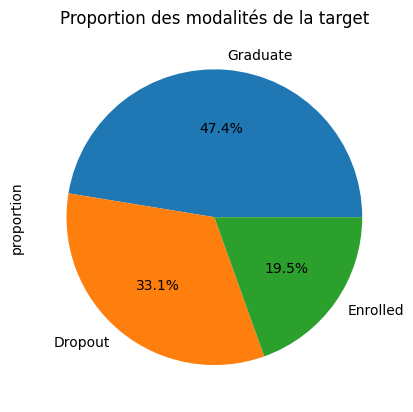

In [69]:
#Récupération des proportion de la target en % :
target_prop = pd.value_counts(df.Target, normalize = True)*100
target_prop.plot(kind="pie",autopct='%.1f%%', title="Proportion des modalités de la target")
plt.show()

In [70]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 76518  │ │ int64       │ 30    │                                                          │
│ │ Number of columns │ 38     │ │ float64     │ 7     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA  ┃ NA %  ┃ mean      ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ id                    │   0 │     0 │     38260 │   22090 │     0 │ 19130 │ 38260 │ 57390 │ 76520 │ ▇▇▇▇▇▇ │  │
│ │ Marital status        │   0 │     0 │     1.112 │  0.4417 │     1 │     1 │     1 │     1 │     6 │   ▇▁   │  │
│ │ Application mode      │   0 │     0 │     16.05 │   16.68 │     1 │     1 │    17 │    39 │    53 │ ▇▃  ▅  │  │
│ │ Application order     │   0 │     0 │     1.644 │    1.23 │     0 │     1 │     1 │     2 │     9 │  ▇▁▁   │  │
│ │ Course                │   0 │     0 │      9001 │    1803 │    33 │  9119 │  9254 │  9670 │  9991 │      ▇ │  │
│ │ Daytime/evening       │   0 │     0 │    0.9153 │  0.2784 │     0 │     1 │     1 │     1 │     1 │ ▁    ▇ │  │
│ │ attendance            │     │       │           │         │       │       │       │       │       │        │  │
│ │ Previous              │   0 │     0 │     3.659 │   8.624 │     1 │     1 │     1 │     1 │    43 │   ▇    │  │
│ │ qualification         │     │       │           │         │       │       │       │       │       │        │  │
│ │ Previous              │   0 │     0 │     132.4 │      11 │    95 │   125 │ 133.1 │   140 │   190 │   ▃▇▂  │  │
│ │ qualification (grade) │     │       │           │         │       │       │       │       │       │        │  │
│ │ Nacionality           │   0 │     0 │     1.227 │   3.392 │     1 │     1 │     1 │     1 │   109 │   ▇    │  │
│ │ Mother's              │   0 │     0 │     19.84 │    15.4 │     1 │     1 │    19 │    37 │    44 │ ▇ ▅ ▁▇ │  │
│ │ qualification         │     │       │           │         │       │       │       │       │       │        │  │
│ │ Father's              │   0 │     0 │     23.43 │   14.92 │     1 │     4 │    19 │    37 │    44 │ ▅ ▅  ▇ │  │
│ │ qualification         │     │       │           │         │       │       │       │       │       │        │  │
│ │ Mother's occupation   │   0 │     0 │     8.583 │   17.47 │     0 │     4 │     7 │     9 │   194 │   ▇    │  │
│ │ Father's occupation   │   0 │     0 │     8.882 │    16.8 │     0 │     5 │     7 │     9 │   195 │   ▇    │  │
│ │ Admission grade       │   0 │     0 │     125.4 │   12.56 │    95 │   118 │ 124.6 │   132 │   190 │  ▂▇▆▁  │  │
│ │ Displaced             │   0 │     0 │    0.5693 │  0.4952 │     0 │     0 │     1 │     1 │     1 │ ▆    ▇ │  │
│ │ Educational special   │   0 │     0 │  0.003738 │ 0.06102 │     0 │     0 │     0 │     0 │     1 │   ▇    │  │
│ │ needs                 │     │       │           │   

##### Observation : 
- l'aperçu du jeu de données montre que nous avons uniquement des données numérique exceptée la target
- Les proportions de la target **ne sont pas équilibrées**, il faudra utiliser le paramètre **stratify** du train test split pour **séparer en respectant les proportions des classes y**
- Pas de données manquantes donc **pas d'imputation de données à faire**

### 2. Datavizualisation & test statistiques : 
- Séparation des variables en fonction de leur type :
    - D'abord nous allons regarder le dtype int (logiquement les variables discrètes) et voir le nombre de modalité qu'elles peuvent prendre
        - Si la variable prend **plus de 10 modalités** alors nous allons la traiter comme une variable **continue**
        - Sinon elle restera une variable discrète
    - Les variables de type **float** pour les **variables continues**
    - variables type **object pour les variable qualitative** (en l'occurence ici uniquement la **target**)

In [13]:
var_cont,var_dis = [], []
#Affichons le nom de la variable en bleu, les 5 premières valeurs prise et le nombre total de valeur différente qu'elle peut prendre 
#si la variable prend plus de 10 valeurs différentes, nous l'afficheront en rouge et nous la considèrerons comme une varaiable continue, sinon une variable discrète
for i in df.select_dtypes('int'):
    if i!="id":
        if df[i].nunique()<10:
            print(f'{colored(i,"blue",attrs=["bold"]):-<59}: {df[i].unique()[:5]} ({colored(df[i].nunique(),"green", attrs=["bold"])})')
            var_dis.append(i)
        else:
            print(f'{colored(i,"blue",attrs=["bold"]):-<59}: {df[i].unique()[:5]} ({colored(df[i].nunique(),"red", attrs=["bold"])})')
            var_cont.append(i)
from termcolor import colored

Marital status--------------------------------: [1 2 4 3 5] (6)
Application mode------------------------------: [ 1 17 39 44  7] (22)
Application order-----------------------------: [1 2 3 6 4] (8)
Course----------------------------------------: [9238 9254 9500  171 9085] (19)
Daytime/evening attendance--------------------: [1 0] (2)
Previous qualification------------------------: [ 1 19 39 40 12] (21)
Nacionality-----------------------------------: [ 1 26 41 24  6] (18)
Mother's qualification------------------------: [ 1 19  3 37 38] (35)
Father's qualification------------------------: [19  3 37 38  1] (39)
Mother's occupation---------------------------: [5 9 2 3 4] (40)
Father's occupation---------------------------: [5 9 3 2 1] (56)
Displaced-------------------------------------: [0 1] (2)
Educational special needs---------------------: [0 1] (2)
Debtor----------------------------------------: [0 1] (2)
Tuition fees up to date-----------------------: [1 0] (2)
Gender----------------

In [14]:
#ajoutons les features "float" à notre liste var_cont :
var_cont = list(df.select_dtypes("float").columns)+var_cont

In [15]:
#Variable qualitative :
var_qual = df.Target.name

### Visualisation des données
#### Analyse univariée
- Visualisation des **variables continues** & test de shapiro (normalité)


In [16]:
def shapiro_test(list_col):
    """
    Cette fonction teste si list_col est une liste, si ce n'est pas le cas,
    elle convertie le texte en une liste avant de faire un test shapiro pour vérifier
    si la feature suit une loi normale ou non
    """
    if type(list_col) != list:
        list_col = [list_col]

    accepted,rejected = [], []

    for col in df[list_col]:
        stat, p_value = shapiro(df[col])  
        alpha = 0.05
        if p_value > alpha: 
            result = colored('Accepter', 'green')  
            accepted.append(col)
        else:
            result = colored('Rejet','red')        
            rejected.append(col)

        print(f'{col:-<50}\t Hypothèse: {result}')

In [17]:
def visualisation_plot(columns, nrow,ncol):
    plt.figure(figsize=(22,20))
    for i, column in enumerate(list(df[columns].columns), 1):
        plt.subplot(nrow,ncol,i)
        ax=sns.histplot(x=column,data=df,kde=True,color="orange")
        ax.axvline(df[column].mean(), c = "red", label = "Moyenne")
        ax.axvline(df[column].median(), c = "yellow", label = "Mediane")
        ax.legend()

    plt.show()

In [18]:
%%time
shapiro_test(var_cont)

NameError: name 'shapiro' is not defined

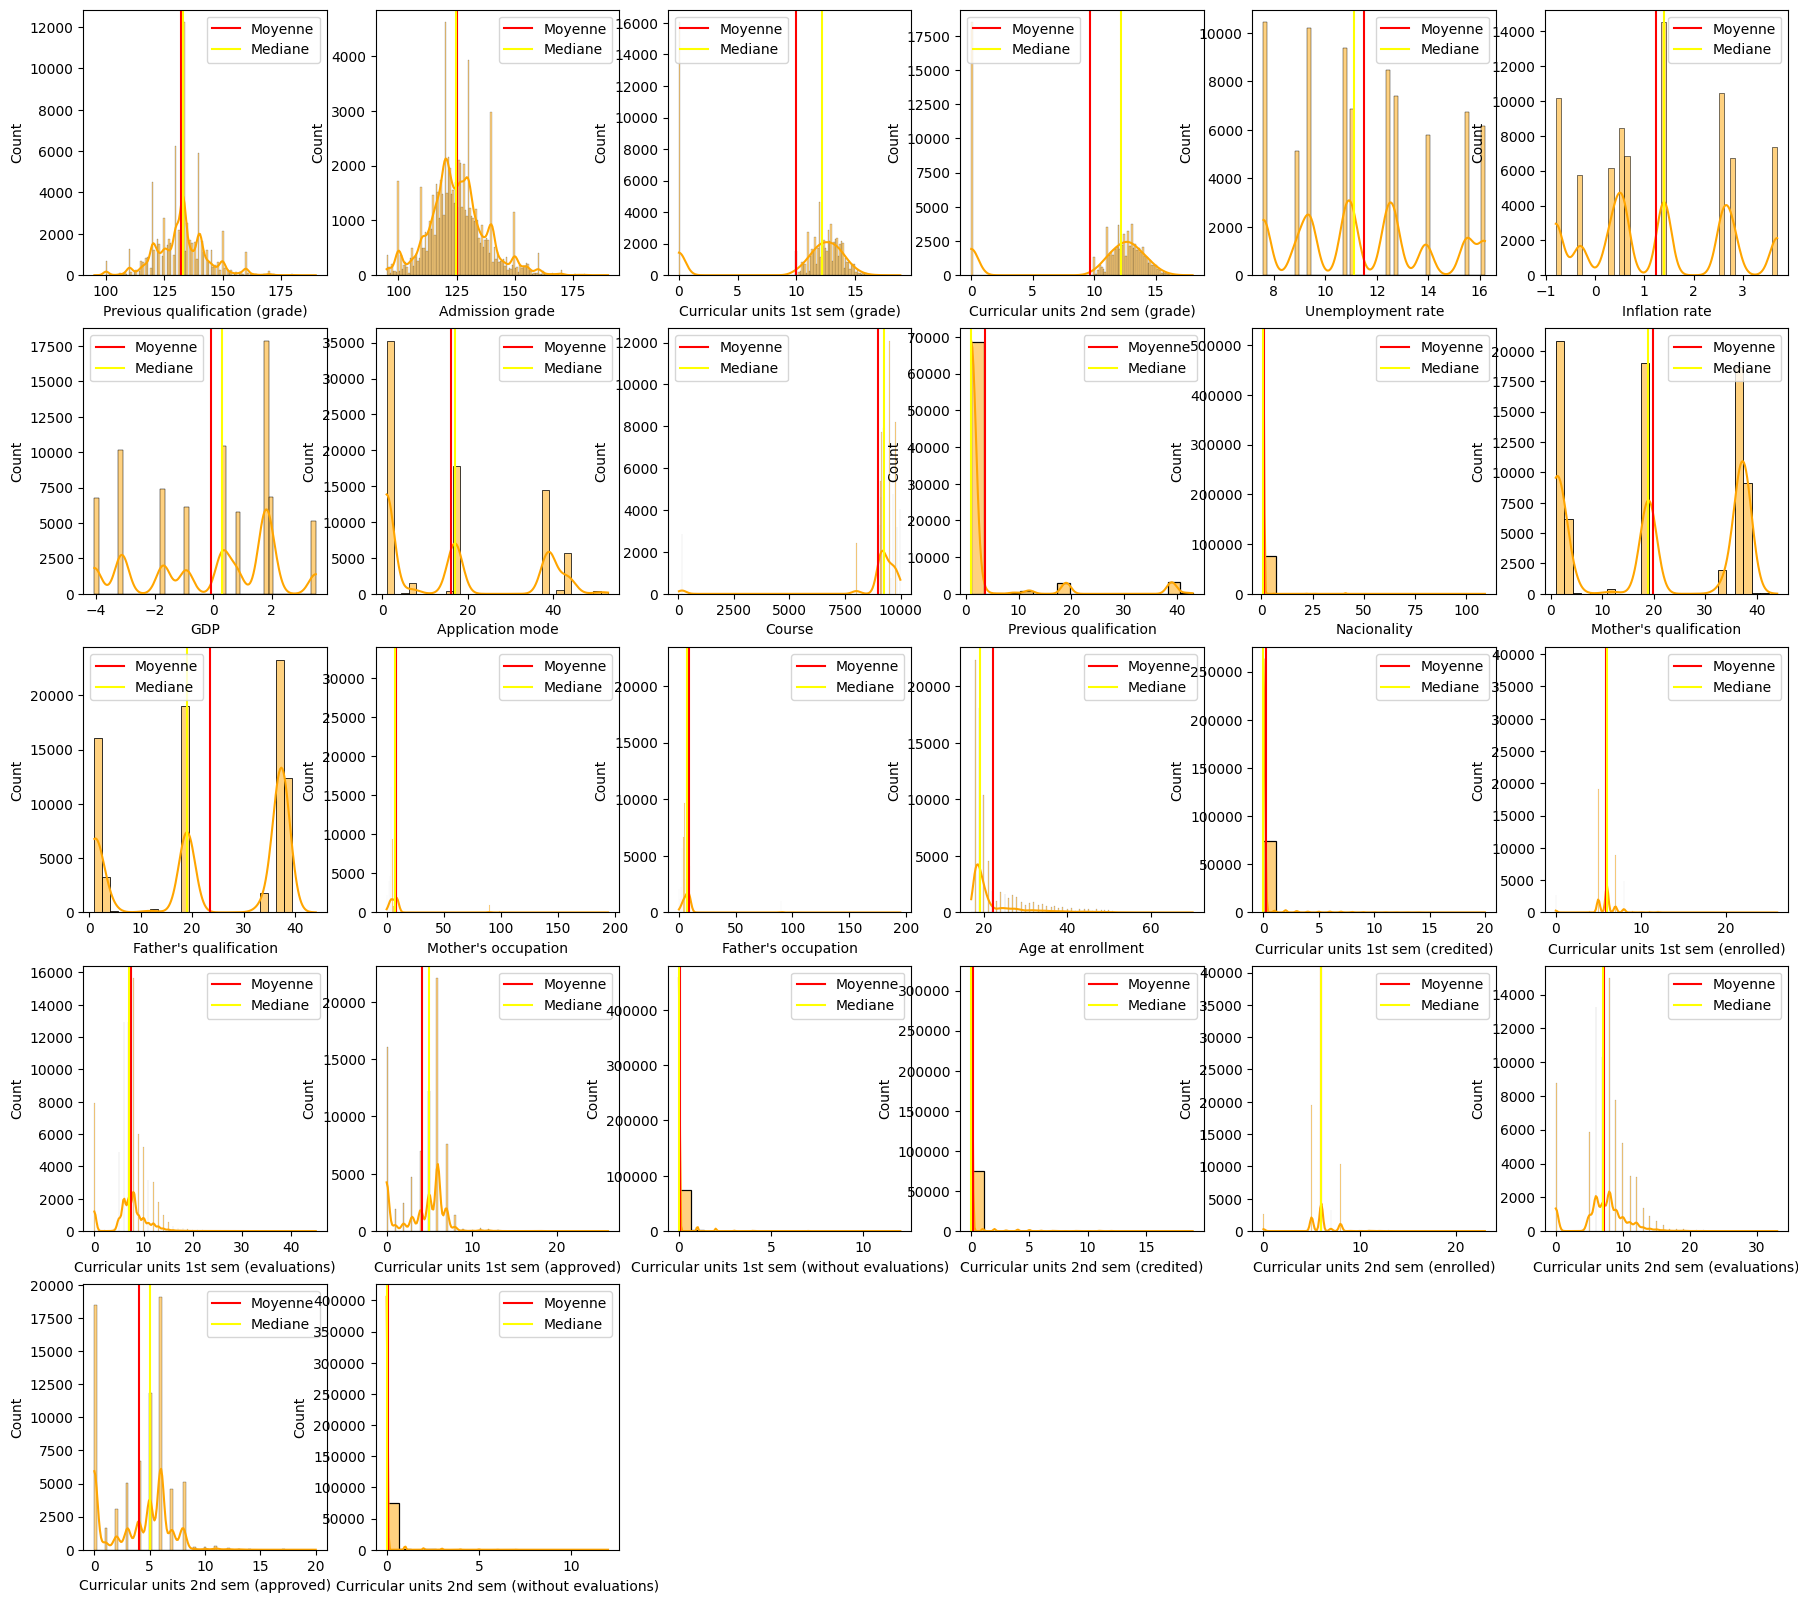

CPU times: user 32.9 s, sys: 9.63 s, total: 42.5 s
Wall time: 27.6 s


In [77]:
%%time
visualisation_plot(var_cont, 5,6)

#### Observation : 
- Aucune de ces variables ne suit de loi normale
- On apprend par exemple que la population étudiée ici est essentiellement portuguais (Nacionality = 1)


##### Remarque : 
- Nous voyons ici que certaines features comme "Father's qualification" ou encore  "Mother's qualification" sont représentés par quelques modalités en grande majorité (moins de 5 modalités)
- Plutôt que de les considérer comme des variables continues à cause du nombre important de valeur qu'elles peuvent prendre, nous allons plutôt **réduire leur nombre de modalité**
- Regardons les variables suivantes pour mieux comprendre :

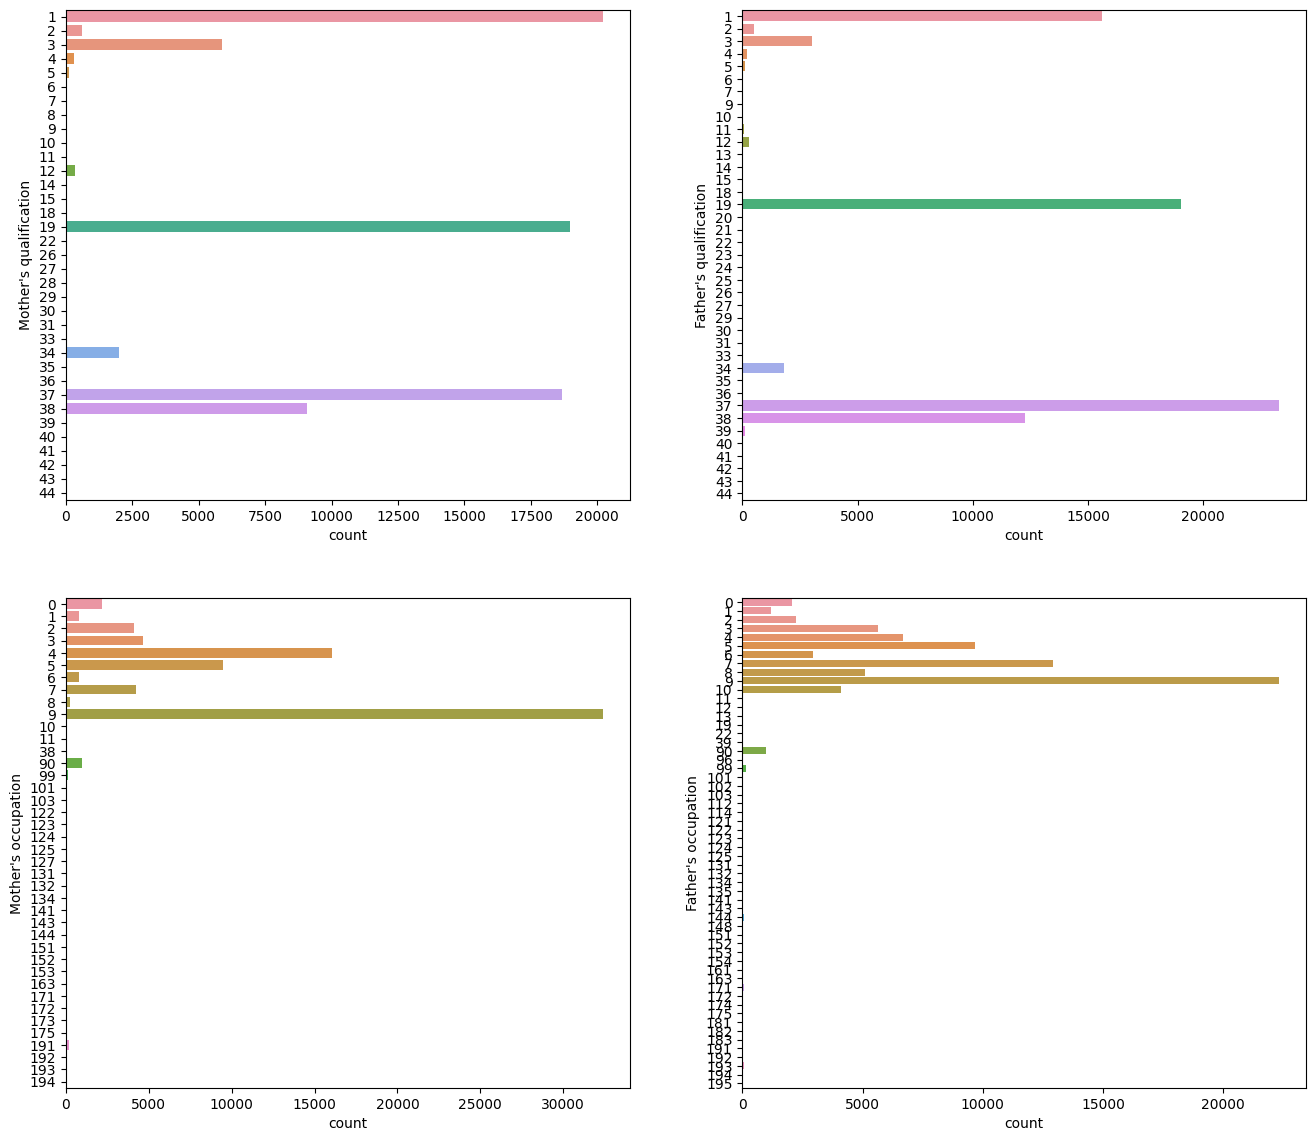

In [78]:
plt.figure(figsize=(16,14))
plt.subplot(2,2,1)
sns.countplot(y = "Mother's qualification", data = df)
plt.subplot(2,2,2)
sns.countplot(y = "Father's qualification", data = df)

plt.subplot(2,2,3)
sns.countplot(y = "Mother's occupation",  data = df )
plt.subplot(2,2,4)
sns.countplot(y = "Father's occupation", data = df)

plt.show()

#### Observation :
- On voit que ce soit pour le père ou la mère, sur l'ensemble des occupation ou qualification proposées, nous avons moins de 10 réponses qui sont fréquentes
- Plutôt que de traiter ces features comme des variables continues, nous allons **réduire le nombre de modalité** afin de les **traiter comme des variables discrètes**

Pour cela, nous allons récupérer toutes les variables discrètes que nous avions considérée comme continue dans notre jeu de données, et **remplacer toutes les modalités qui sont très peu représentée (par exemple inférieur à 15%) par la valeur 999 qui signifiera "Autre" (ou Other)**


##### Faisons un essai sur une colonne : 

In [19]:
#Par exemple, on pourrait remplacer toutes les modalités (index) de la variable Father's qualification qui sont inférieur à 15% dans le jeu de données 
#par la variable 999 par exemple, elle se traduirait "other"
temp_col = df["Father's qualification"].value_counts(normalize=True).mul(100).round(2)[df["Father's qualification"].value_counts(normalize=True).mul(100)<10]
temp_col[:5]

Father's qualification
3     3.94
34    2.34
2     0.65
12    0.38
4     0.29
Name: proportion, dtype: float64

Pour remplacer les index ci-dessus par la valeur 999, on peut s'aider de apply de la façon suivante : 

In [20]:
#Tout d'abord, récupérons les index à changer : 
index_replace = temp_col.index
index_replace #voici les valeurs qui devront être remplacé pour la colonne 

Index([ 3, 34,  2, 12,  4, 39,  5, 11, 36, 29, 40,  9, 14, 43, 30, 41, 22, 10,
        6, 26, 42, 35, 18, 13, 44, 20, 27,  7, 33, 31, 21, 23, 15, 24, 25],
      dtype='int64', name='Father's qualification')

In [21]:
col_temp = df["Father's qualification"].apply(lambda x : 999 if x in index_replace else x) #Si la valeur obtenue dans la ligne se trouve également
#dans index_replace, alors on remplace cette valeur par 999; sinon, on laisse la valeur sans modification

In [22]:
#Verifions : 
col_temp.value_counts(normalize = True).mul(100).round(2)

Father's qualification
37     30.44
19     24.85
1      20.39
38     16.01
999     8.31
Name: proportion, dtype: float64

Nous nous retrouvons avec un nombre de modalité a été fortement réduit, plus facilement exploitable

#### Sur toutes les variables :

In [23]:
var_dis_temp = list(df[var_cont].select_dtypes(exclude="float").columns)
for i in var_dis_temp:
    temp_col = df[i].value_counts(normalize=True).mul(100).round(2)[df[i].value_counts(normalize=True).mul(100)<10]
    index_replace = temp_col.index #récupération des index
    df[i] = df[i].apply(lambda x : 999 if x in index_replace else x) #remplacement des valeurs cible par 999

In [24]:
#Verifions
[df[i].value_counts(normalize=True).mul(100).round(2) for i in var_dis_temp]

[Application mode
 1      46.04
 17     21.59
 39     18.97
 999    13.39
 Name: proportion, dtype: float64,
 Course
 999     53.00
 9500    15.78
 9773    10.73
 9238    10.37
 9147    10.12
 Name: proportion, dtype: float64,
 Previous qualification
 1      87.8
 999    12.2
 Name: proportion, dtype: float64,
 Nacionality
 1      99.34
 999     0.66
 Name: proportion, dtype: float64,
 Mother's qualification
 1      26.40
 19     24.80
 37     24.39
 999    12.56
 38     11.84
 Name: proportion, dtype: float64,
 Father's qualification
 37     30.44
 19     24.85
 1      20.39
 38     16.01
 999     8.31
 Name: proportion, dtype: float64,
 Mother's occupation
 9      42.32
 999    24.33
 4      20.99
 5      12.35
 Name: proportion, dtype: float64,
 Father's occupation
 999    41.33
 9      29.17
 7      16.87
 5      12.63
 Name: proportion, dtype: float64,
 Age at enrollment
 999    33.58
 18     29.24
 19     23.63
 20     13.55
 Name: proportion, dtype: float64,
 Curricular units 1s

- Le remplacement à été fait correctement, maintenant nous pourrons visualiser les données discrètes bien plus facilement

In [25]:
#Mise à jour des variables discrètes : 
var_dis_temp = list(df[var_cont].select_dtypes(exclude = "float")) #récupération des variables discrètes anciennement considérées comme continue
var_dis = var_dis + var_dis_temp #Ne pas oubliée les premières variables discrètes + celles qu'on vient de modifier

#Mise à jour de la liste des variables continues :
var_cont = list(df[var_cont].select_dtypes("float"))

In [26]:
#Avant de poursuivre, vérifions que nous n'avons pas oubliée de colonne : 
df.shape[1] == len(["id"])+len(df[var_dis].columns)+len(df[var_cont].columns)+len([df[var_qual].name])

True

### Visualisation des variables discrètes :

In [87]:
def discret_plot_viz(columns,nrow,ncol):
    plt.figure(figsize=(26,24))
    for i, column in enumerate(list(df[columns].columns), 1):
        plt.subplot(nrow,ncol,i)
        ax=sns.countplot(x=column,data=df, )
        ax.legend()
    plt.show()

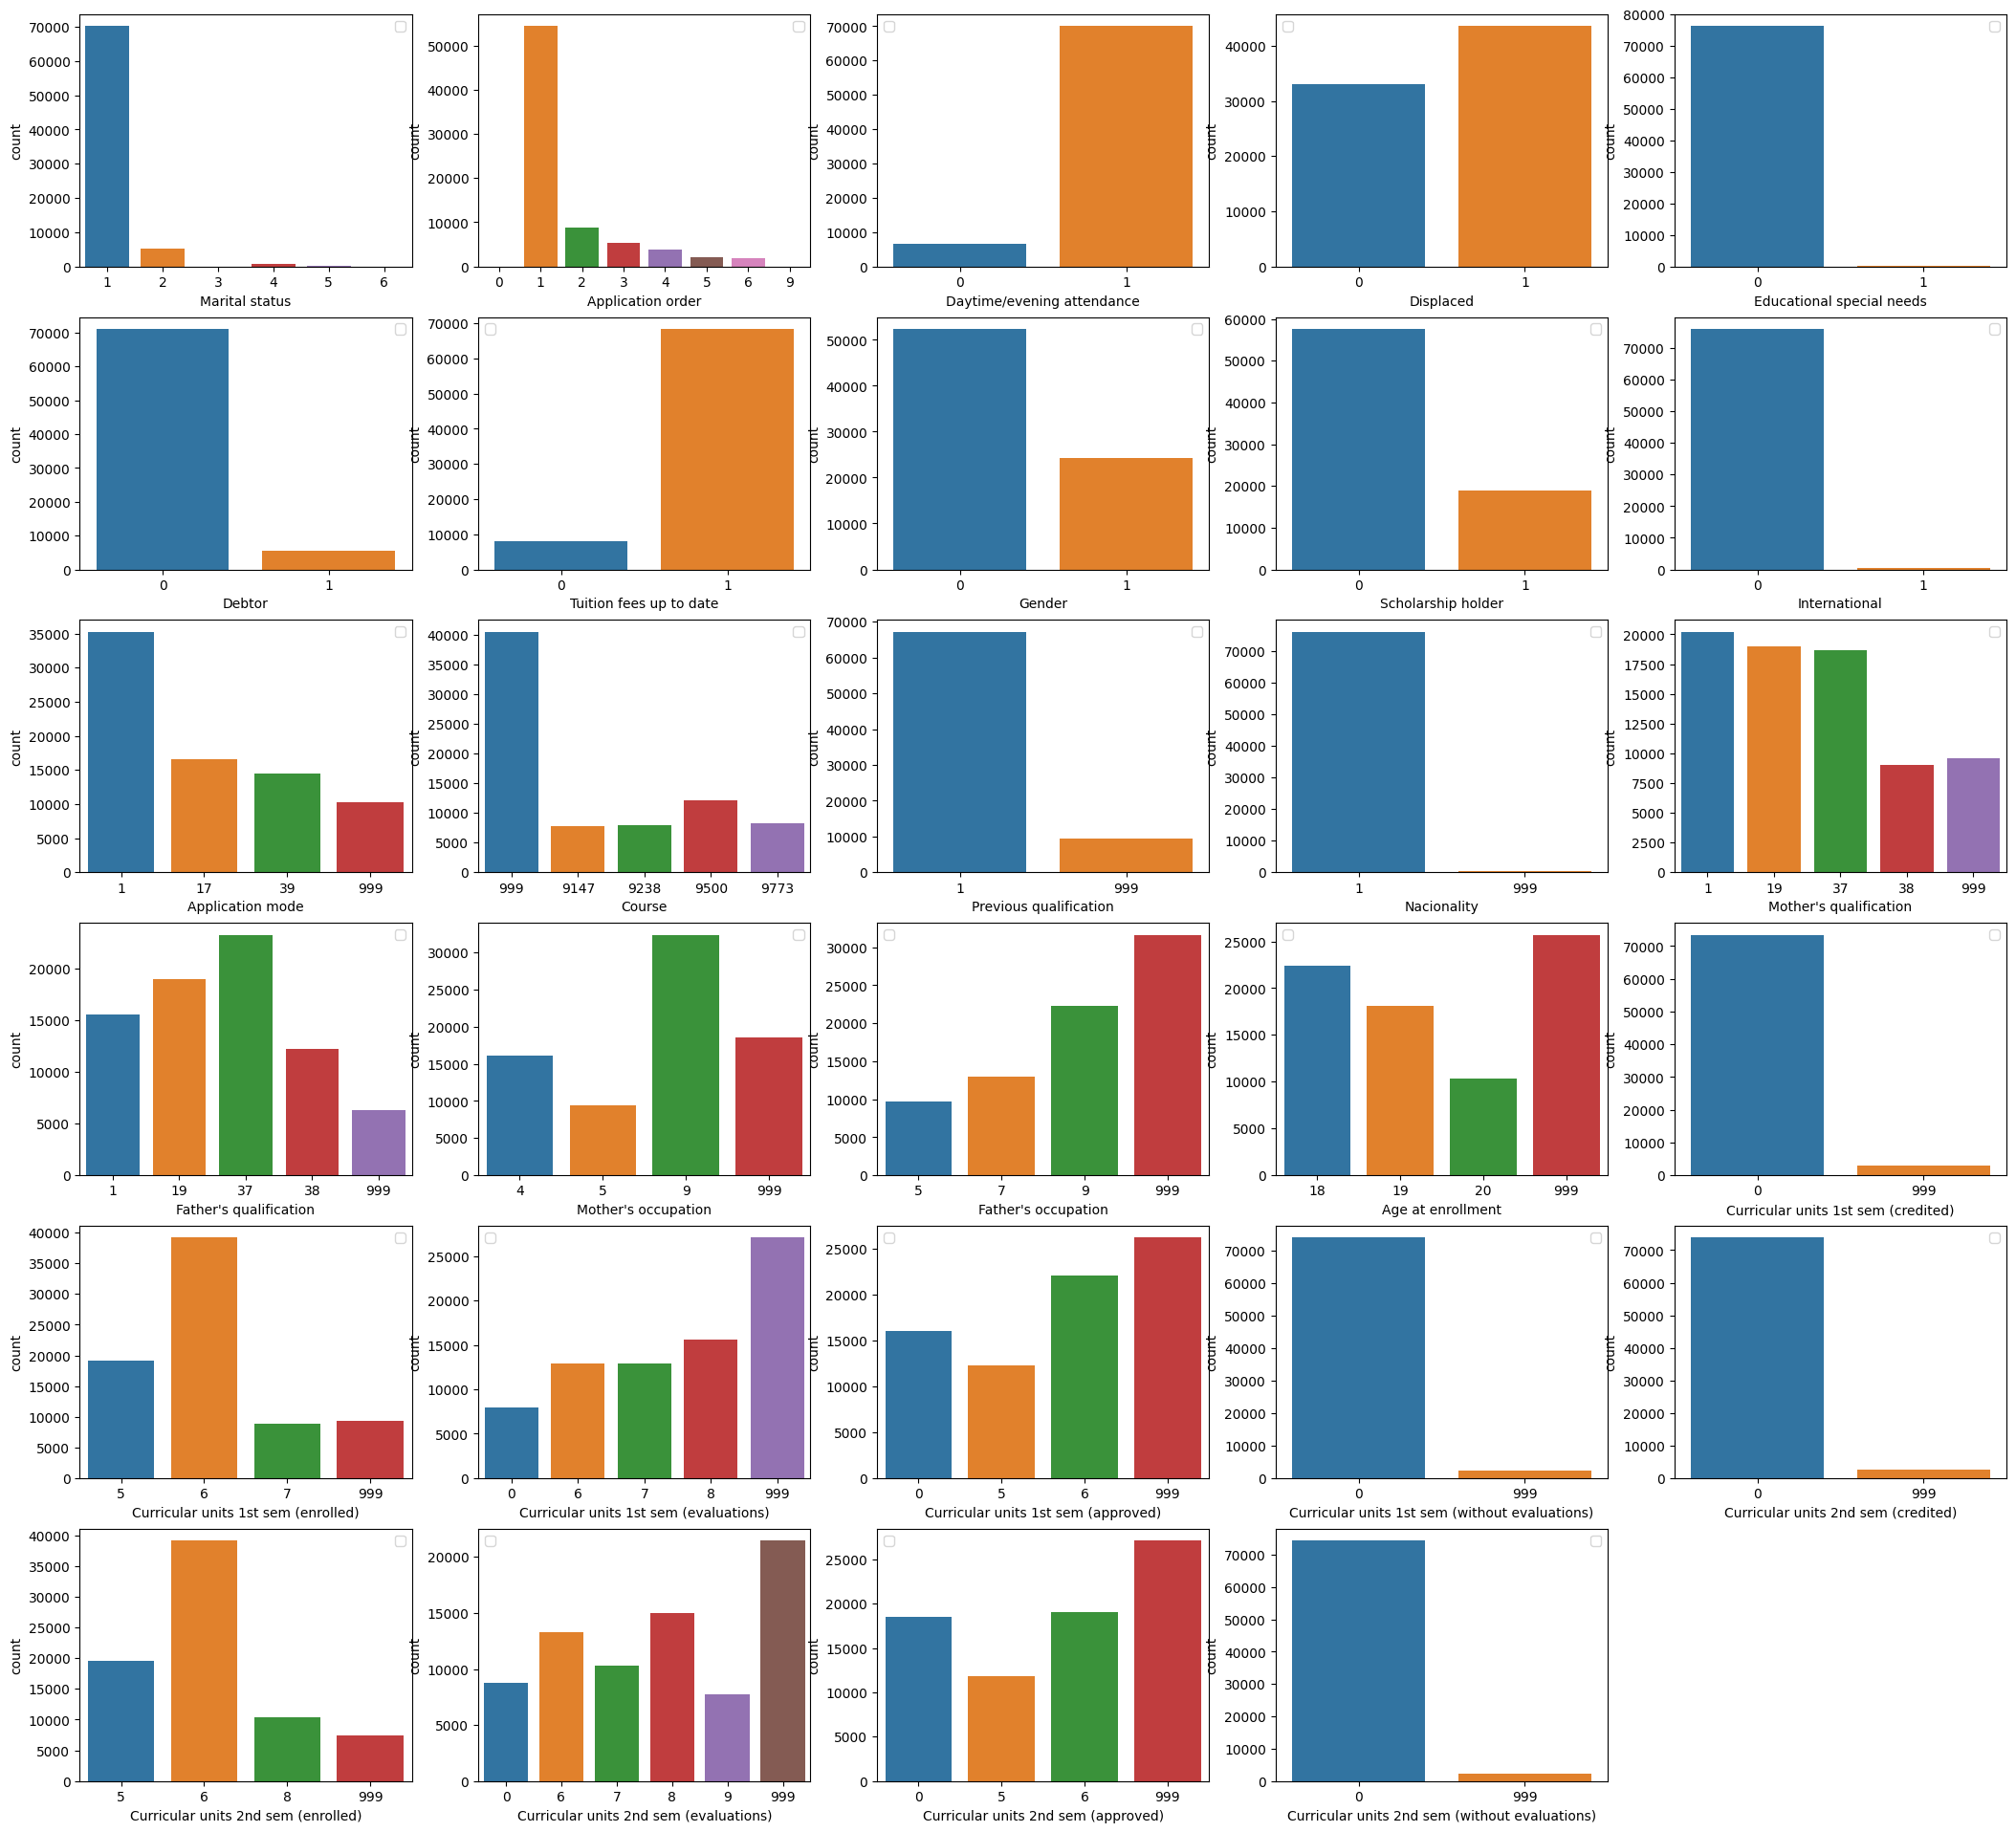

CPU times: user 4.54 s, sys: 241 ms, total: 4.78 s
Wall time: 4.54 s


In [88]:
%%time
discret_plot_viz(var_dis, 6,5)


#### Observation :
- La première chose que l'on remarque, c'est que la visualisation des variables discrètes que nous avions considérées comme continue, est cette fois-ci bien plus agréable 
- Nous pouvons plus facilement interpréter les résultats obtenus :
    - Nous avons une population constitué d'une majorité de femme (Gender 1 = male,  0 = female )
    - Beaucoup de personne célibataire ( = 1)
    - très peu de personne provenant de l'étranger (international = 0 en majorité)

etc...


### Variable qualitative : target

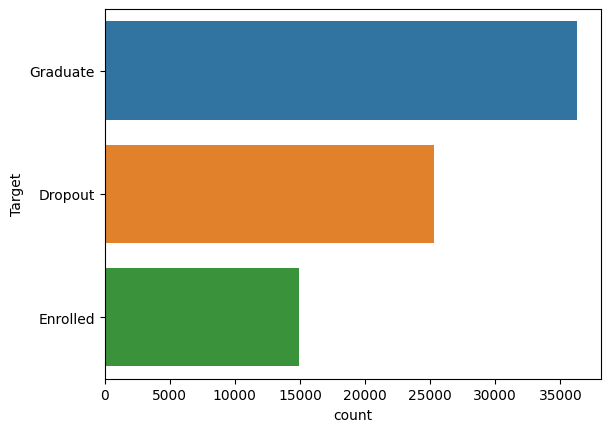

In [89]:
sns.countplot(y =df[var_qual])
plt.show()

#### Sauvegarde du dataframe avant potentielle réduction de features via test statistique

In [28]:
df.to_csv('df_preprocessed_withoutfeaturereduction.csv')

### Test Statistique : 
#### Target vs variable continues : Test de Kruskal-Wallis
- Notre target peu prendre plus de deux modalités (3), et les variables continues ne suivent pas de loi normale, donc au lieu d'utiliser un test ANOVA, le plus adapté ici est le test de Kruskal-Wallis
- Nous allons tester la target avec chacune des variables continues et voir s'il existe une dépendance ou non entre celles-ci

In [90]:
def kruskal_test(features,target):
    var_a_garder= []
    var_a_supprimer = []
    """
    Test de kruskal wallis afin de déterminer s'il existe une dépendance entre une variable
    qualitative à plus de deux modalités et une variable quantitative continue
    """
#Si "feat" n'est pas une liste :
    if type(features)!= list:
        features = [features]
    
    print(colored("P-Values :","magenta",attrs=["bold"]))
    for feature in features:
        #Séparation des données en fonction des valeurs obtenues par la variable qualitative
        grouped_data = [df.loc[df[target]==category, feature] for category in df[target].unique()]
    
        #Partie test  avec kruskal wallis 
        statistic, pval = kruskal(*grouped_data)
        
        #résultat a interpréter :
        alpha = 0.05
        if pval<alpha: #rejet H0 avec le risque alpha 5%, et on conserve la variable
            var_a_garder.append(feature)
            print(f" {colored(feature,'green')} : {pval}")
        else: #conservation de l'hypothèse H0, peu de chance qu'il y ait 
            #une association statistiquement significative, suppression de la variable
            var_a_supprimer.append(feature)
            print(f" {colored(feature,'red')} : {pval}")
    return var_a_garder,var_a_supprimer

In [91]:
var_cont_a_garder, var_cont_a_suppr = kruskal_test(var_cont,"Target")

P-Values :
 Previous qualification (grade) : 0.0
 Admission grade : 0.0
 Curricular units 1st sem (grade) : 0.0
 Curricular units 2nd sem (grade) : 0.0
 Unemployment rate : 1.8021099109378373e-70
 Inflation rate : 7.525235150754035e-14
 GDP : 3.2710330316697127e-246


Ici on **conservera toutes les variables**

#### Target vs variable discrètes : Test du khi2

In [92]:
def khi2(features, target):
    """Fonction permettant l'application d'un test de chi2 de contingence entre 2 variables qualitatives (ou discrètes)"""
    #Listes qui contiendra les variables triées après le test statistique
    var_a_supprimer = []
    var_a_conserver = []
    
    #Si la features entrée est au format str on la transforme en liste :
    if type(features)!=list:
        features = [features]
    print(colored("P-values :\n","magenta",attrs=["bold"]))
    
    for feature in features :
        alpha = 0.05
        df_temp = pd.crosstab(df[target], df[feature])
        pval = chi2_contingency(df_temp)[1] #récupération uniquement de la pvalue
        
        if pval<alpha:
            var_a_conserver.append(feature) #On rejette l'hypothèse H0 (H0 = pas de différence entre les population) au risque de 5% de se tromper
            print(f"{colored(feature,'green',attrs=['bold'])} : {pval}")
        else:
            var_a_supprimer.append(feature) #on ne rejette pas H0, et donc on conclu qu'il n'y a pas de différence significative entre les population
            print(f"{colored(feature,'light_red', attrs=['bold'])} : {pval}")
            
    return var_a_conserver,var_a_supprimer

In [93]:
var_dis_a_conserver,var_dis_a_supprimer = khi2(var_dis, "Target")

P-values :

Marital status : 0.0
Application order : 0.0
Daytime/evening attendance : 7.269100328679233e-285
Displaced : 0.0
Educational special needs : 0.8900215041644881
Debtor : 0.0
Tuition fees up to date : 0.0
Gender : 0.0
Scholarship holder : 0.0
International : 0.7257456838845804
Application mode : 0.0
Course : 0.0
Previous qualification : 0.0
Nacionality : 0.7516082416587356
Mother's qualification : 0.0
Father's qualification : 0.0
Mother's occupation : 2.7130688124449084e-117
Father's occupation : 5.2531419411174725e-135
Age at enrollment : 0.0
Curricular units 1st sem (credited) : 7.063975229485964e-09
Curricular units 1st sem (enrolled) : 0.0
Curricular units 1st sem (evaluations) : 0.0
Curricular units 1st sem (approved) : 0.0
Curricular units 1st sem (without evaluations) : 8.630351413880198e-81
Curricular units 2nd sem (credited) : 1.6849025187895025e-14
Curricular units 2nd sem (enrolled) : 0.0
Curricular units 2nd sem (evaluations) : 0.0
Curricular units 2nd sem (approv

Contrairement aux variables continues, ici nous avons 3 variables discrètes à supprimer :

In [94]:
var_dis_a_supprimer

['Educational special needs', 'International', 'Nacionality']

In [95]:
#Suppression des variables discrètes :
var_dis = [var for var in var_dis if var not in var_dis_a_supprimer] 

### Analyse Bivariée 
#### Deux variables continues

CPU times: user 12.2 s, sys: 428 ms, total: 12.6 s
Wall time: 12.2 s


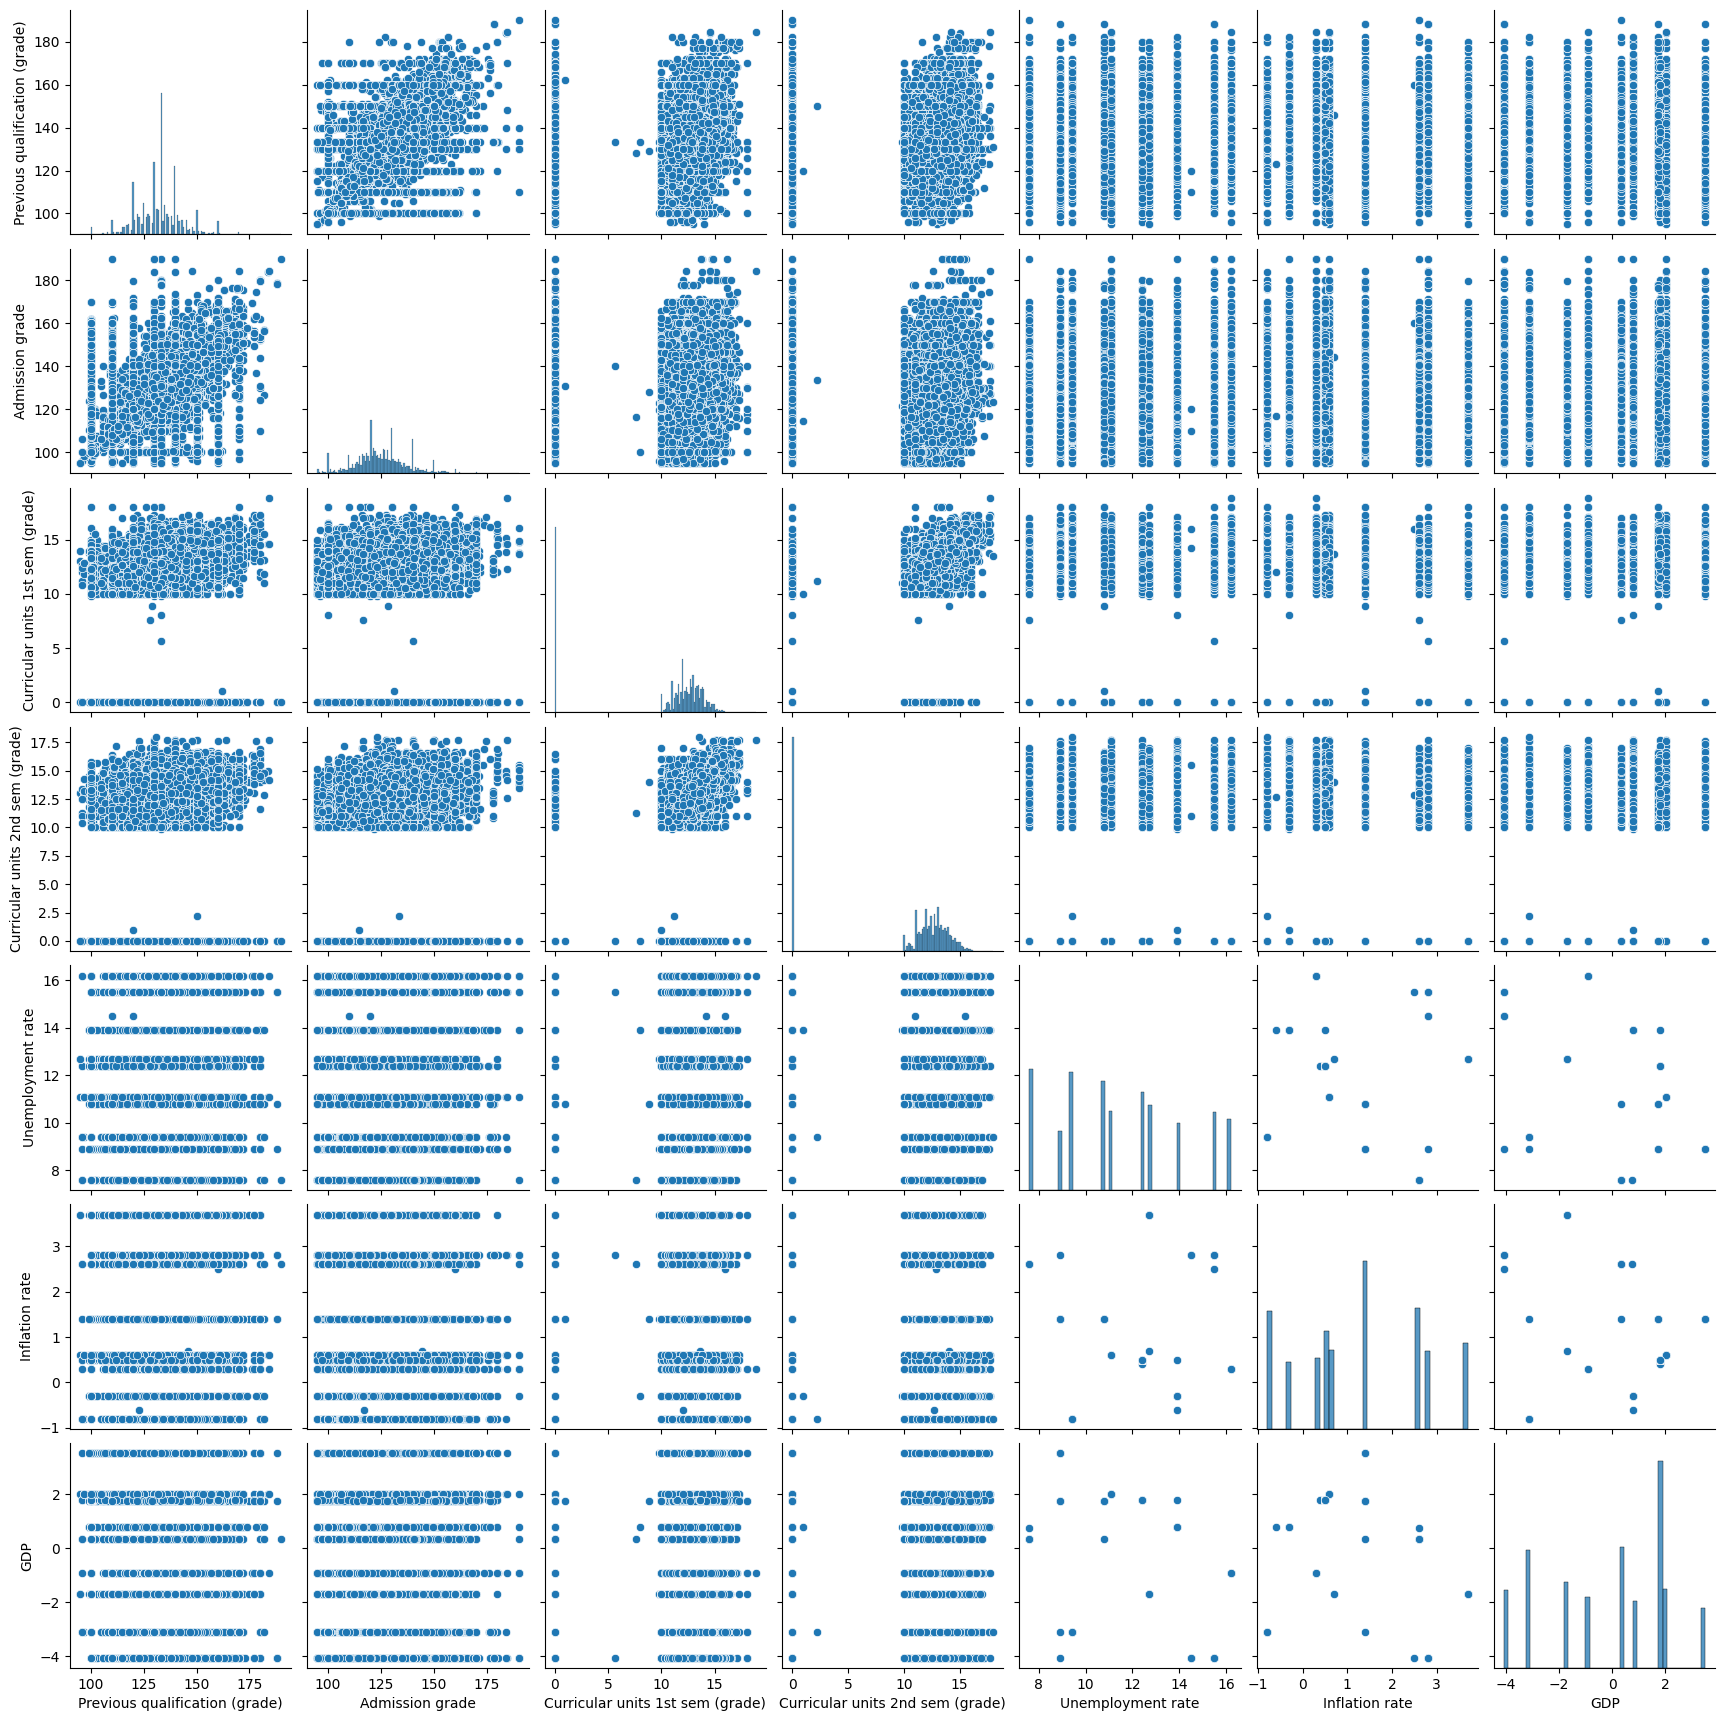

In [96]:
%%time
sns.pairplot(data = df[var_cont])

### Target Vs variables discrètes
**Barplot groupé :**

In [97]:
def grouped_barplot(columns,nrow,ncol):
    plt.figure(figsize=(26,24))
    for i, column in enumerate(list(df[columns].columns), 1):
        plt.subplot(nrow,ncol,i)
        ax=sns.countplot(x=column, hue = df["Target"],data=df )
        ax.legend()
    plt.show()

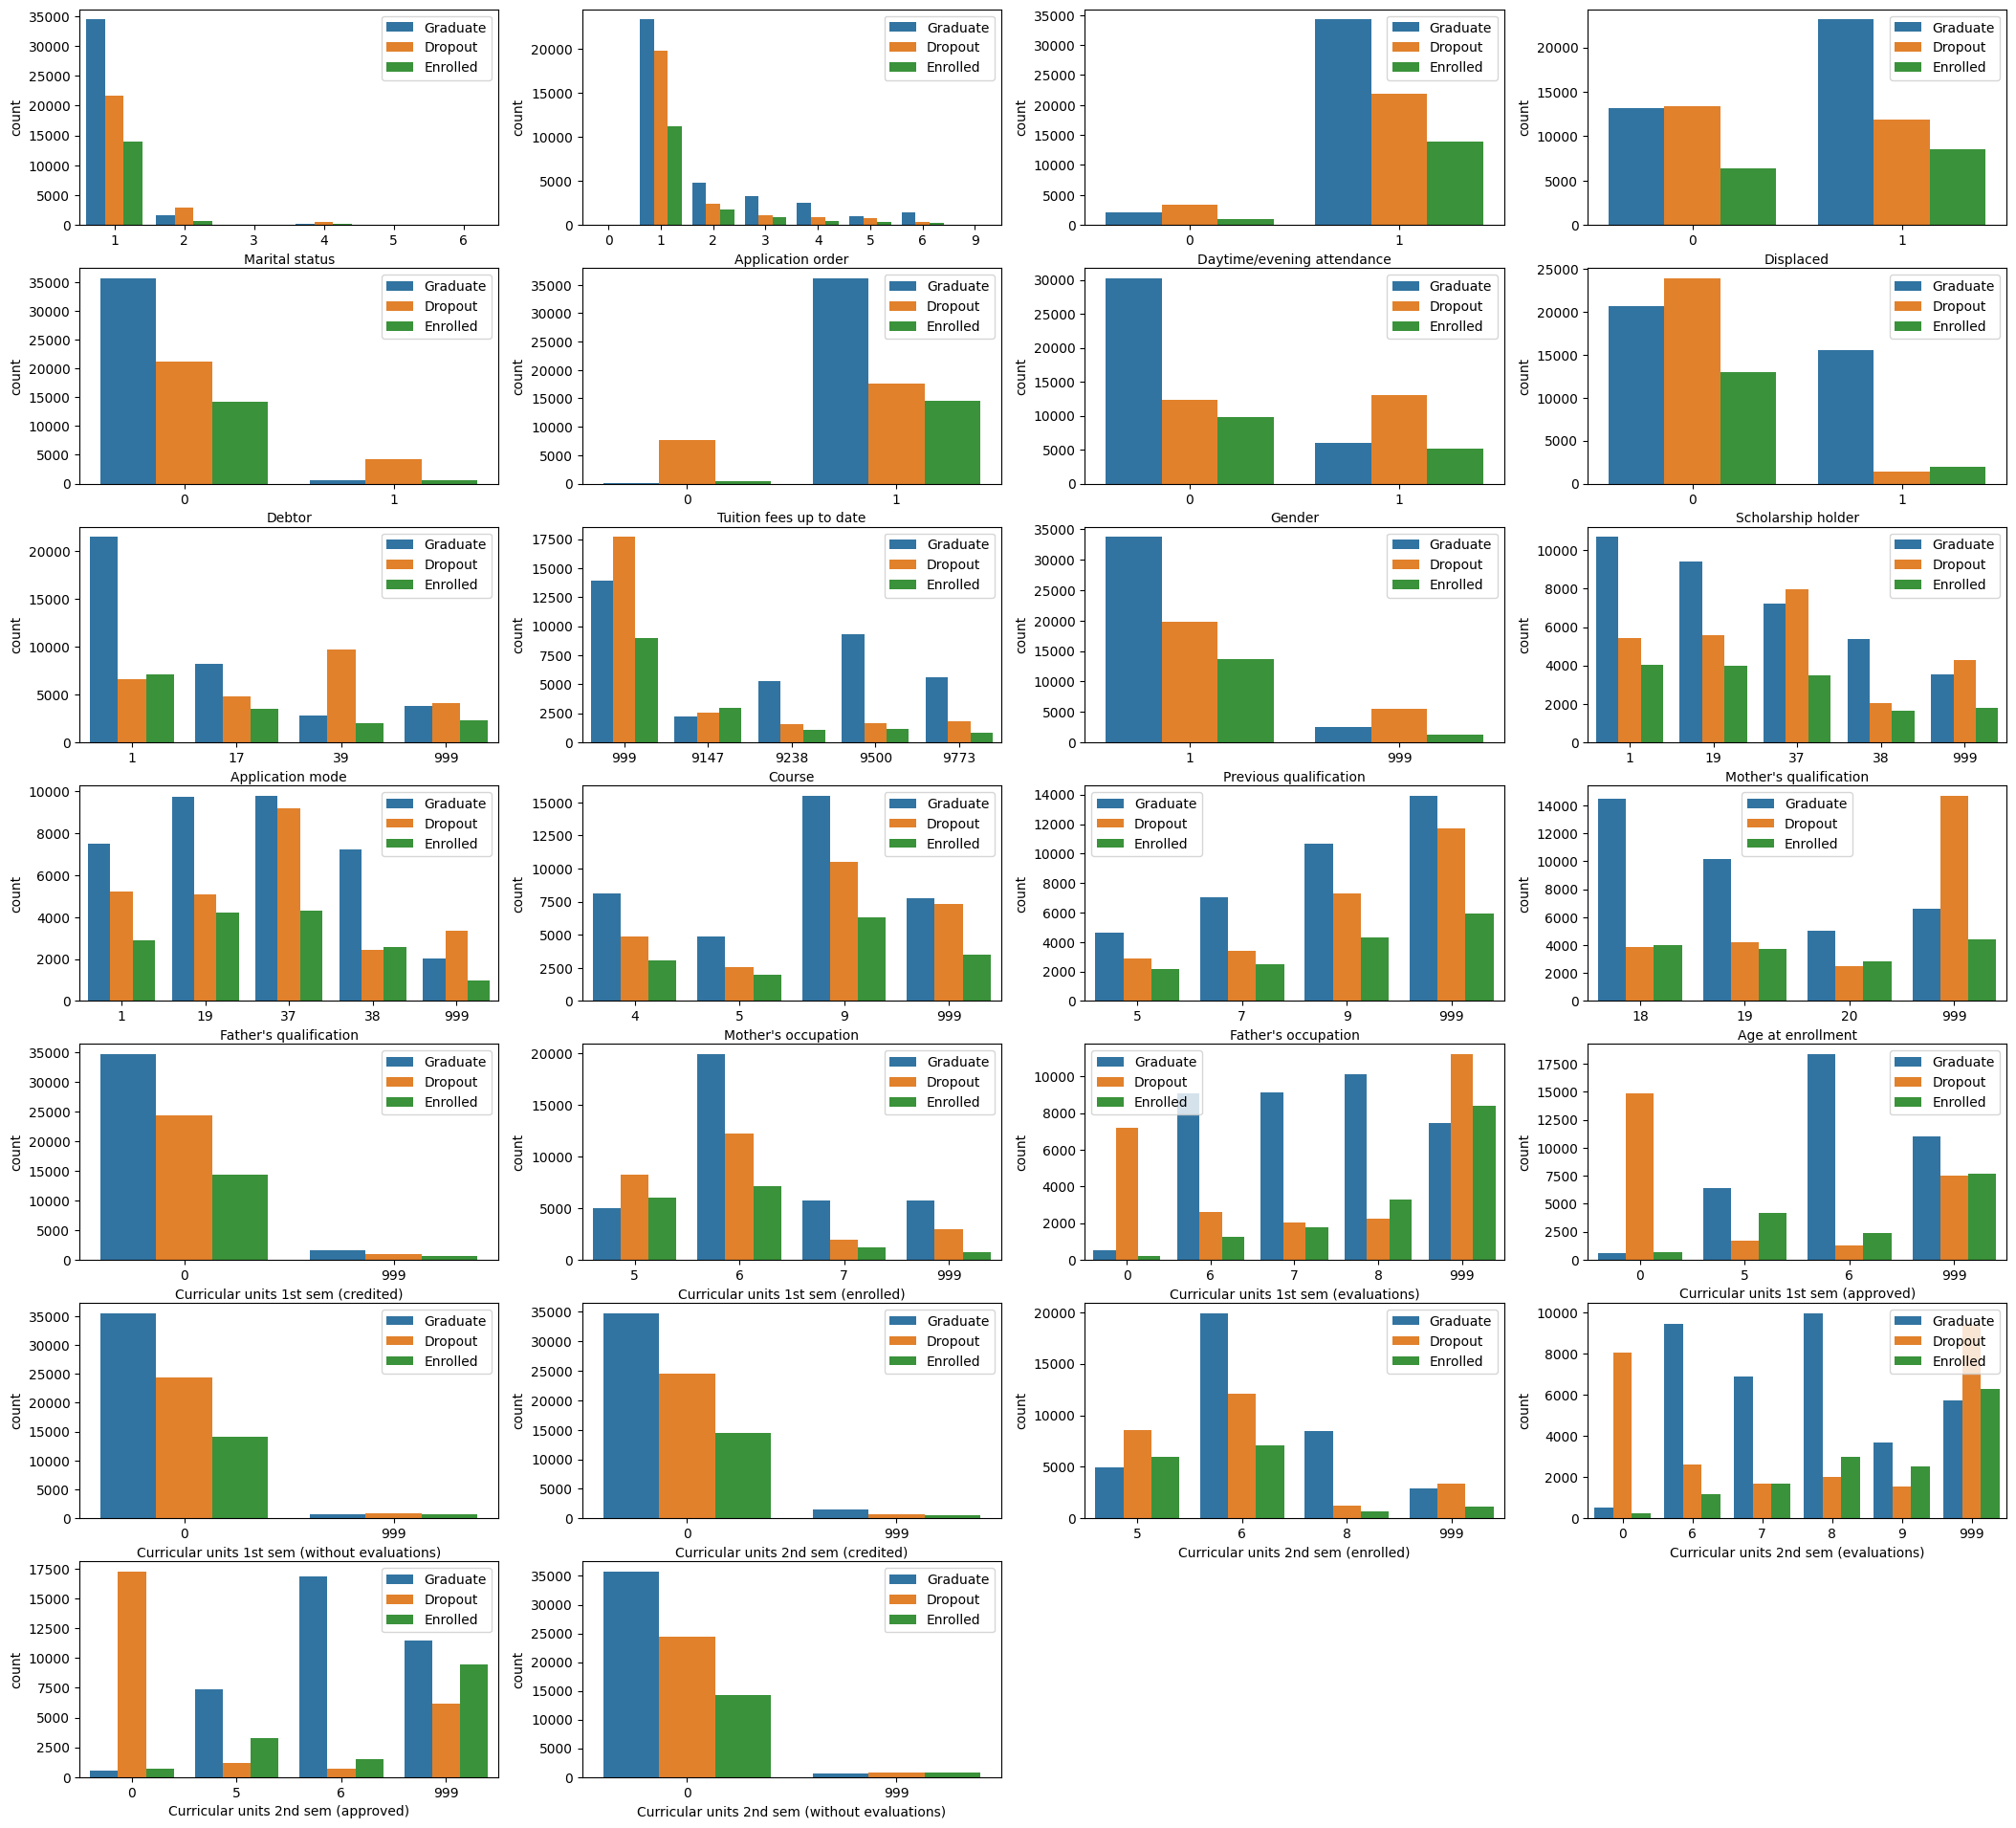

In [98]:
grouped_barplot(var_dis,7,4)

In [99]:
def barplot_empile(columns,nrow,ncol):
    plt.figure(figsize=(26,24))
    for i, column in enumerate(list(df[columns].columns), 1):
        
        df_table = pd.crosstab(df[column], df["Target"])
        ax = plt.subplot(nrow,ncol,i)
        df_table.plot(kind="bar",stacked=True, colormap="coolwarm",figsize=(26,24), ax = ax)
        plt.xlabel(column)
        
    plt.show()

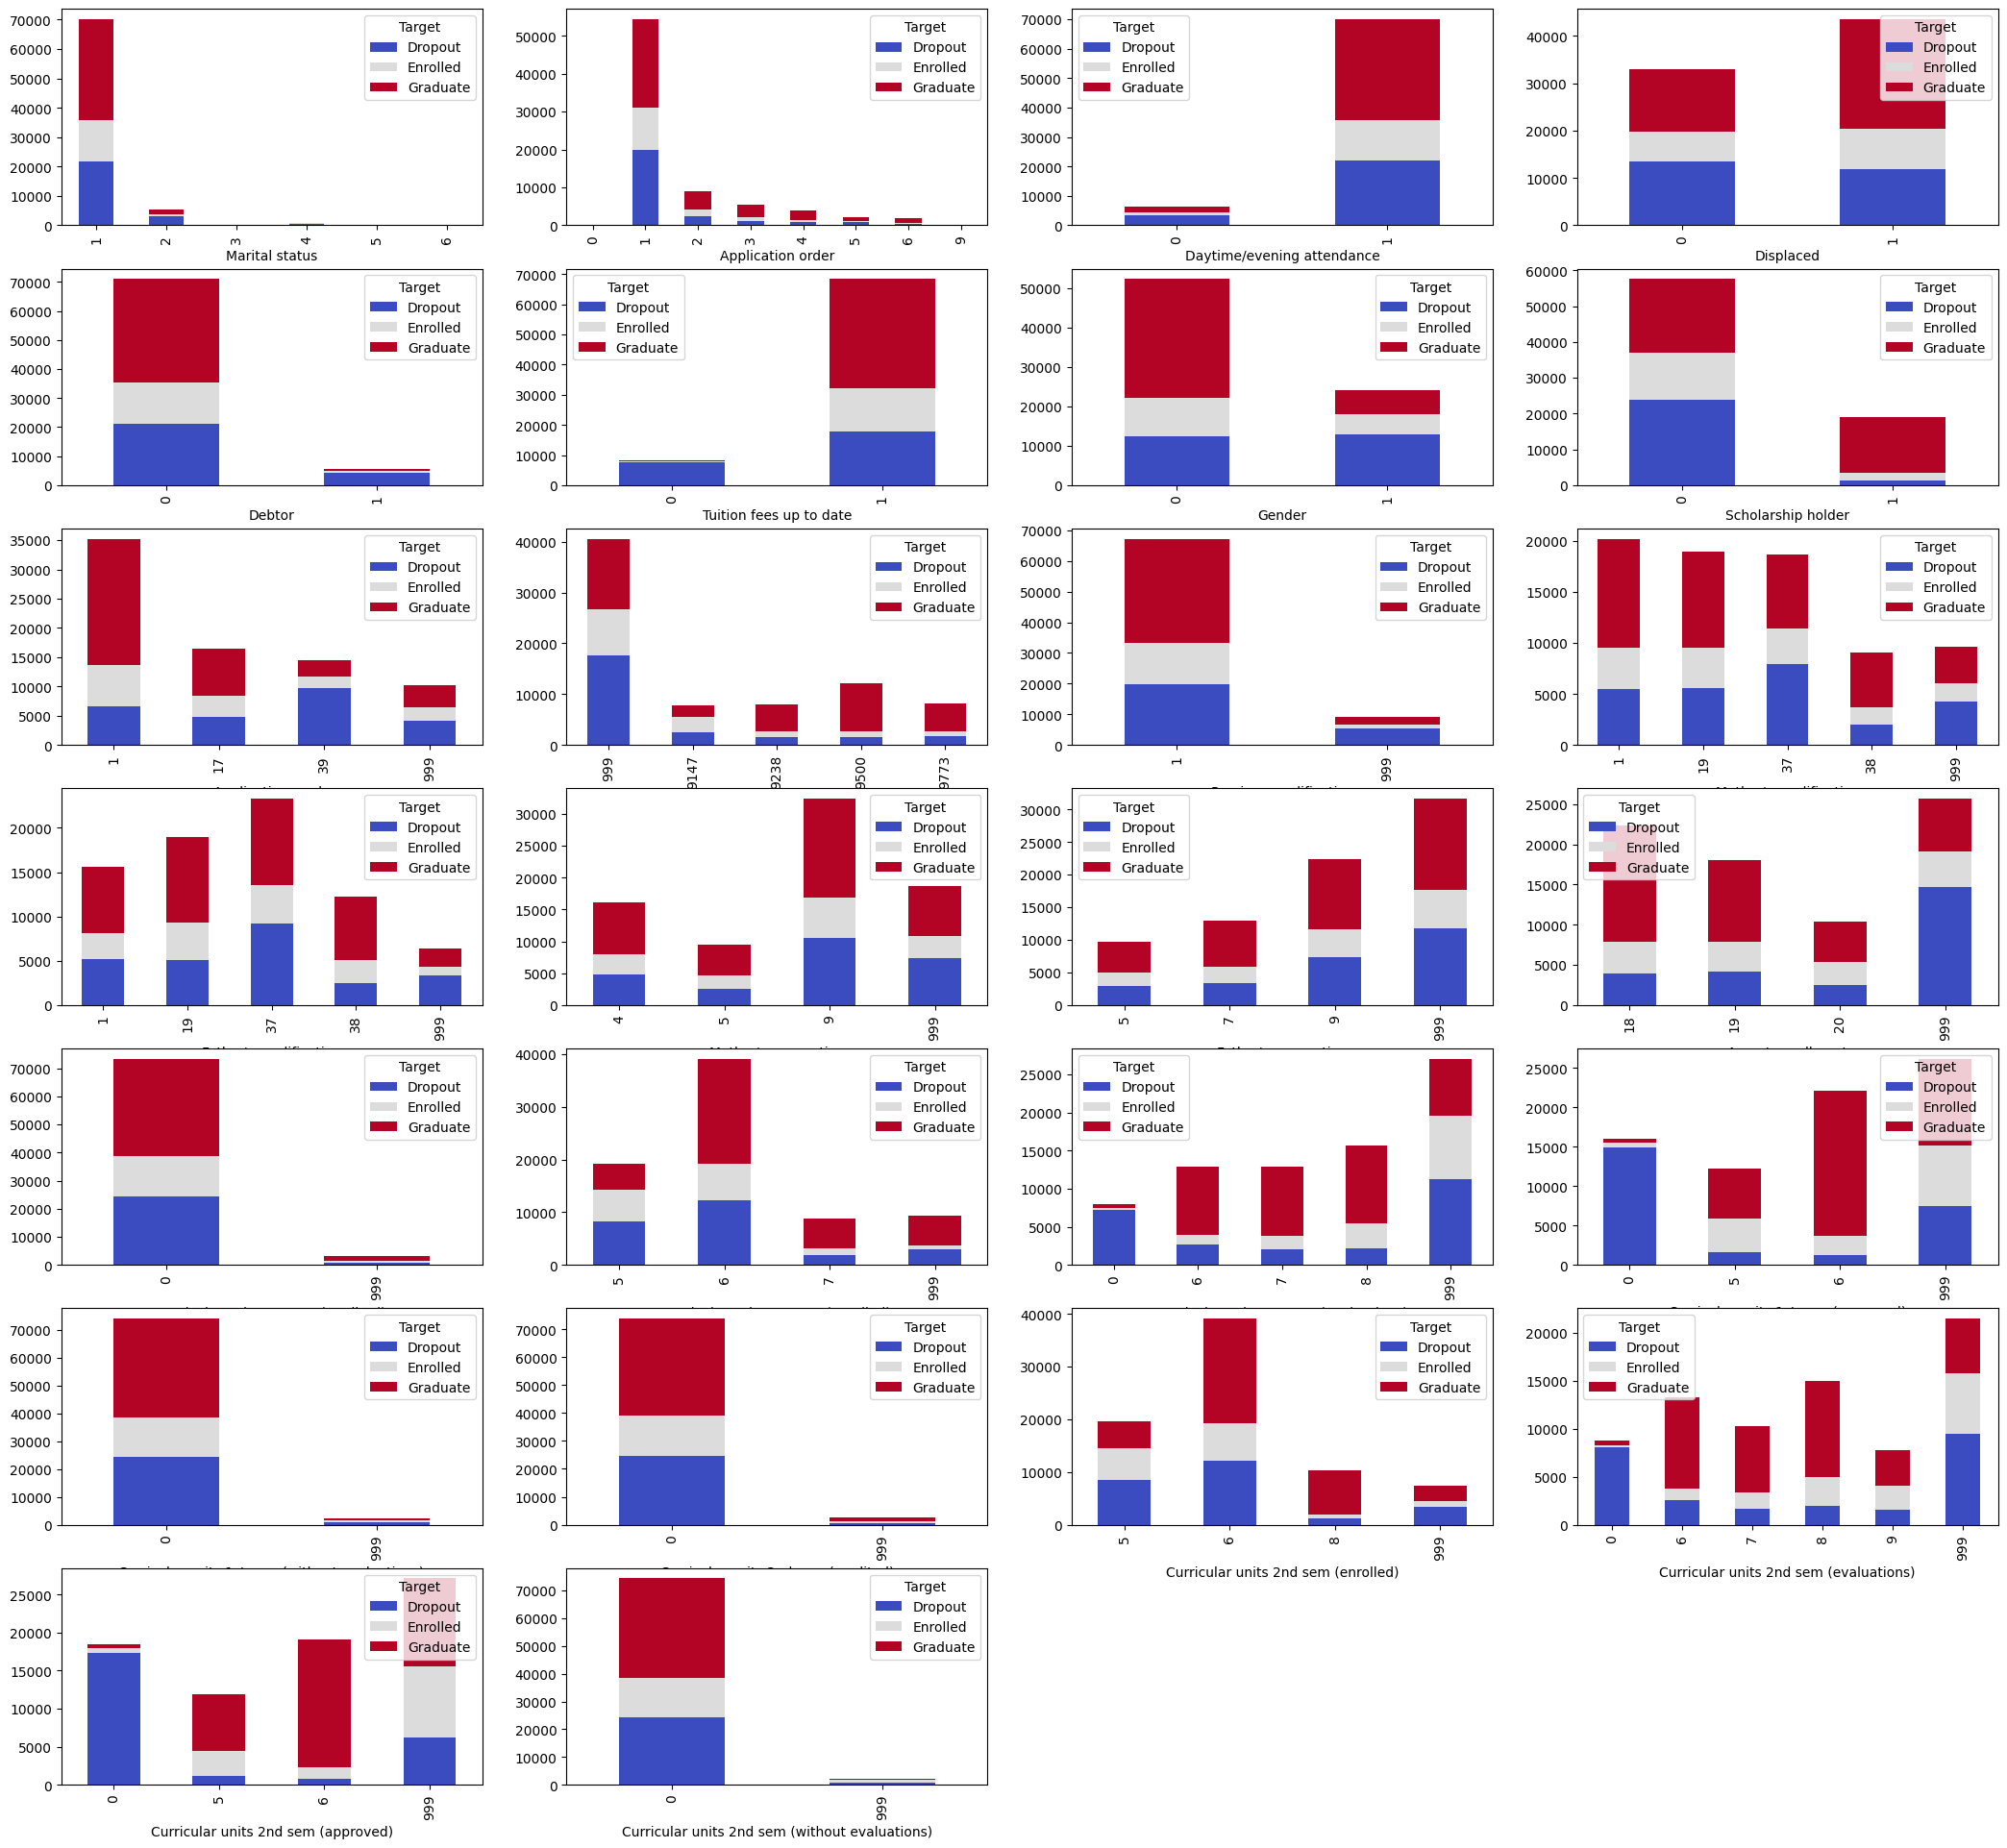

In [100]:
barplot_empile(var_dis,7,4)

### Target Vs variables continues
**Boxplot**

In [101]:
def boxplot_visualisation(features,nrow,ncol):
    plt.figure(figsize=(20,10))

    for i,feat in enumerate(features,start = 1):
        ax = plt.subplot(nrow,ncol,i)
        fig = sns.boxplot(x= "Target", y=feat, data=df, ax=ax)
        fig.set_xticklabels(ax.get_xticklabels(), rotation = 45)
    plt.show()

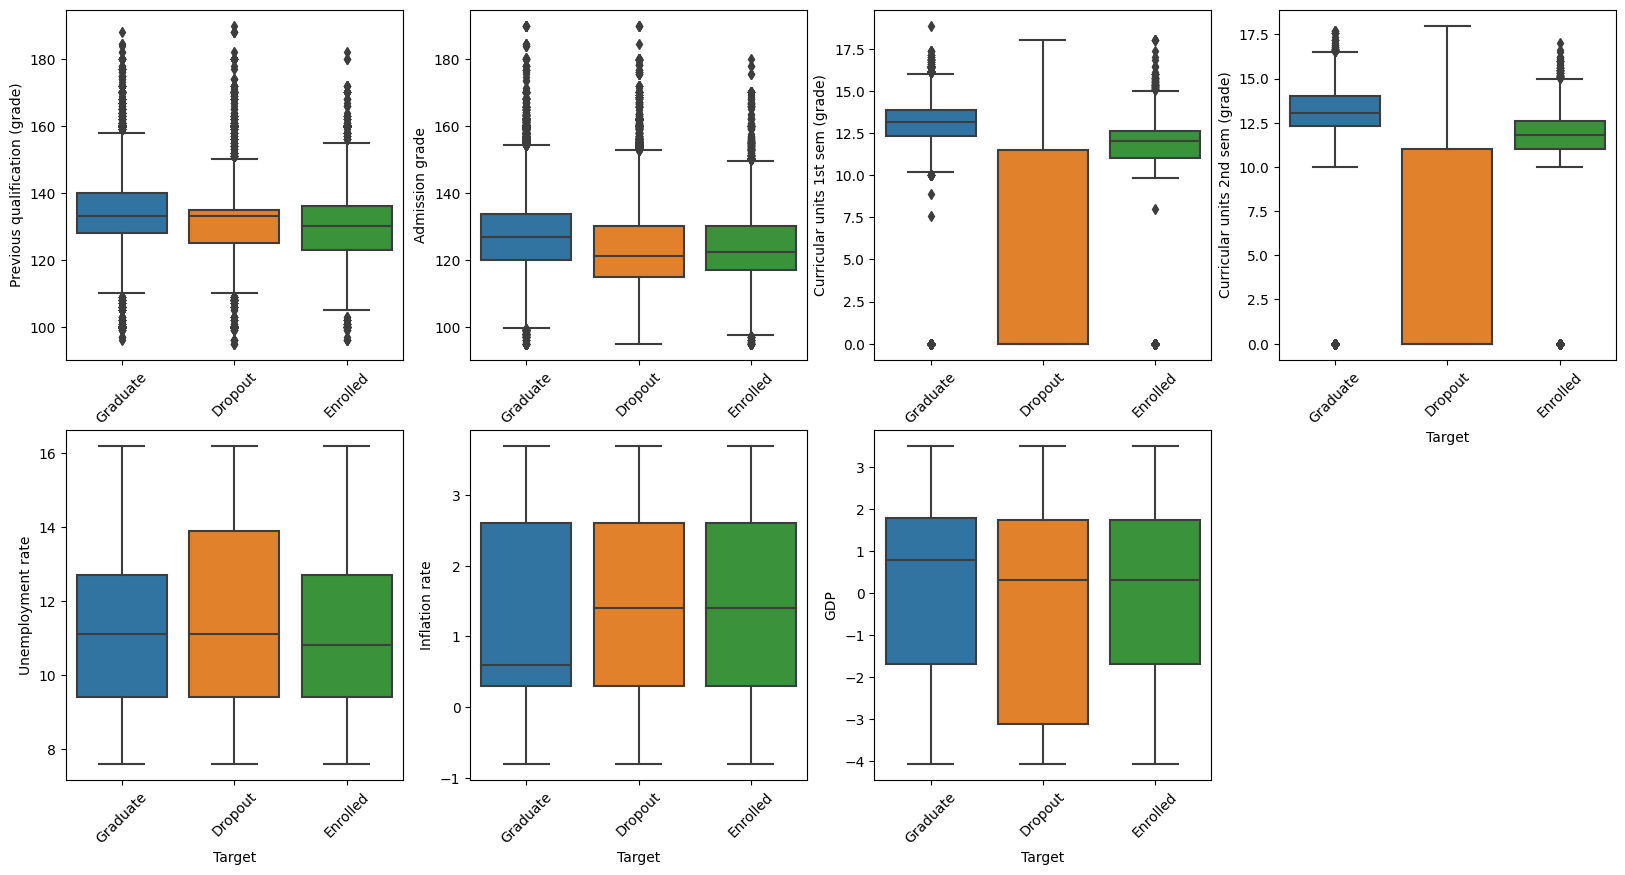

In [102]:
boxplot_visualisation(var_cont,2,4)

### 3. Preprocessing
- Standardisation des variables continues
- Enregistrement du dataframe pour la modélisation


In [103]:
# Standardisation :
scaler = StandardScaler()

In [104]:
df_reduced = pd.concat([df['id'], df[var_cont], df[var_dis], df["Target"]],axis = 1)
X_train,X_test = train_test_split(df_reduced, random_state=42, test_size=0.2)

In [105]:
#entrainement du standardscaler :
scaler.fit(X_train[var_cont])

StandardScaler()

In [106]:
#Standardisation des données :
df_reduced[var_cont] = scaler.transform(df_reduced[var_cont])

In [107]:
df_reduced.head()

,id,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations),Target
0,0,-0.583600,-0.222597,0.854845,0.504641,...,6,7,6,0,Graduate
1,1,-0.674549,-0.445162,0.304098,-1.736123,...,6,9,0,0,Dropout
2,2,0.416840,1.534079,-1.898893,-1.736123,...,6,0,0,0,Dropout
3,3,-0.128854,0.055610,0.492349,0.575212,...,8,999,999,0,Enrolled
4,4,-0.037905,-0.421316,0.557315,0.595645,...,999,999,6,0,Graduate


Les données sont bientôt prêtes, nous allons vérifier qu'elles ont le bon dtypes et ensuite nous enregistrerons le dataframe ainsi que le scaler entrainé

In [108]:
df_reduced.dtypes

id                                                  int64
Previous qualification (grade)                    float64
Admission grade                                   float64
Curricular units 1st sem (grade)                  float64
Curricular units 2nd sem (grade)                  float64
Unemployment rate                                 float64
Inflation rate                                    float64
GDP                                               float64
Marital status                                      int64
Application order                                   int64
Daytime/evening attendance                          int64
Displaced                                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Application mode                                    int64
Course        

In [109]:
#On va transformer la target en category :
df_reduced["Target"] = df_reduced.Target.astype("category")

#### Enregistrement du dataframe et du scaler

In [110]:
df_reduced.to_csv("df_preprocessed")

In [ ]:
df_reduce.head()

In [111]:
import pickle

In [112]:
filename = "scaler.pkl"
with open(filename, 'wb') as file:
    pickle.dump(scaler, file)
print(f"Les données ont été enregistrées dans {filename}")


Les données ont été enregistrées dans scaler.pkl


# Dans le notebook (02_Modelisation_Academic_Success) nous passerons a la modélisation et la soumission du modèle